<a href="https://colab.research.google.com/github/cloning-cmd/first-repository/blob/master/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
df=pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [16]:
#Removing the 1st useless column
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


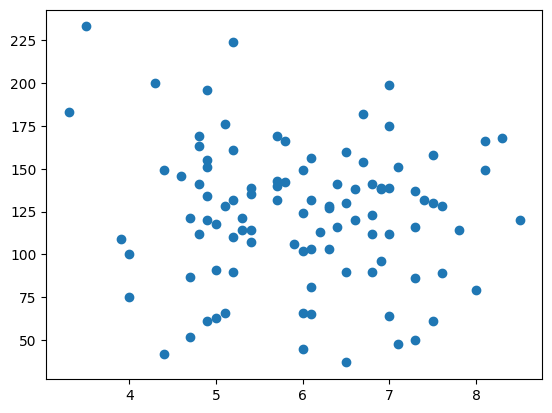

In [17]:
plt.scatter(df['cgpa'],df['iq'])

In [18]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
x_train_res=model.predict(x_train)
x_test_res=model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
training_data_accuracy=accuracy_score(y_train,x_train_res)
test_data_accuracy=accuracy_score(y_test,x_test_res)

In [26]:
training_data_accuracy

0.9375

In [27]:
test_data_accuracy

0.9

<Axes: >

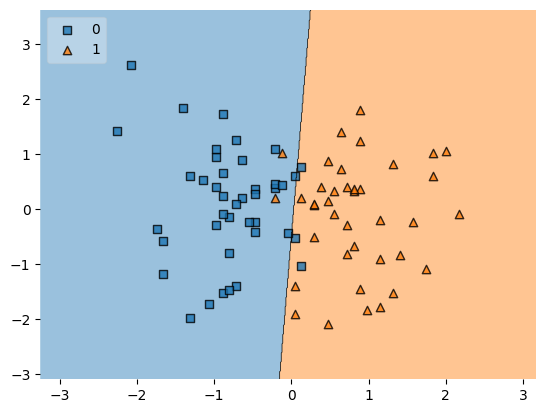

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values,clf=model, legend=2)

In [34]:
import pickle

In [35]:
pickle.dump(model,open('model.pkl','wb'))